# **iWildCam 2022 Competition**

*This notebook was created by Wahub Ahmed, Bailey Hirota, and Ankith Suhas Pinnamaneni*

## 1. Import the following libararies for Data Analysis, CNN & Multi Object Tracking

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import json
import os
import random
import argparse

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import math
import time
import matplotlib.pyplot as plt

import cycler
from matplotlib import colors
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
import tensorflow as tf
from PIL import Image, ImageFile, ImageFont, ImageDraw
import statistics
from torch.utils.data import Dataset,DataLoader
import torch

$X$

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
# definitions
def read_image(path):
  with tf.io.gfile.GFile(path, 'rb') as f:
    return np.array(Image.open(f))


def read_json(path):
  with tf.io.gfile.GFile(path) as f:
    return json.load(f)


def create_detection_map(annotations):
  """Creates a dict mapping IDs to detections."""

  ann_map = {}
  for image in annotations['images']:
    ann_map[image['file'].split('/')[-1].rstrip('.jpg')] = image['detections']
  return ann_map


def image_name_to_id(name):
  return name.rstrip('.jpg')

In [12]:
# import dataset
# please download the dataset here: https://www.kaggle.com/competitions/iwildcam2022-fgvc9/data
# Use for either train or test directory
IMAGES_DIR = "/kaggle/input/iwildcam2022-fgvc9/train/train"
BOX_ANNOTATION_FILE = "/kaggle/input/iwildcam2022-fgvc9/metadata/metadata/iwildcam2022_mdv4_detections.json"
MASKS_DIR = "/kaggle/input/iwildcam2022-fgvc9/instance_masks/instance_masks"

images = tf.io.gfile.listdir(IMAGES_DIR)

# The annotations file contains annotations for all images in train and test
annotations = read_json(BOX_ANNOTATION_FILE)
detection_map = create_detection_map(annotations)
image_ids = list(detection_map.keys())

/kaggle/input/iwildcam2022-fgvc9/train/train/92f83fc0-21bc-11ea-a13a-137349068a90.jpg


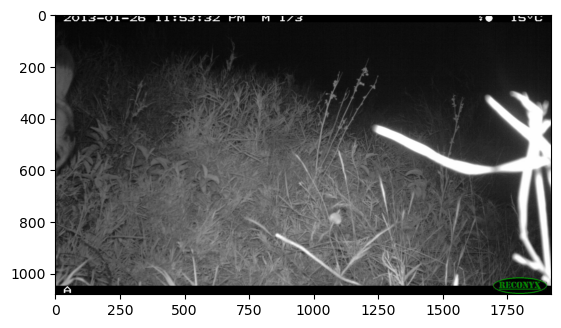

In [17]:
im = Image.open(IMAGES_DIR+"/"+images[0])
print(IMAGES_DIR+"/"+images[0])
plt.imshow(im)

In [5]:
import os
os.getcwd()

'/kaggle/working'

In [8]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/kaggle/input/deep-sort')
from deep_sort import track